# Data PreProcessing 

# Data Loading

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Load the wine equality dataset into pandas 
data = pd.read_csv('medical_cost_insurance.csv')

# Display the first few rows
#print(data.head(20))
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Data Exploring

In [16]:
# display data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [17]:
# Get summary statistics
print(data.describe)

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


In [18]:
## Display the total number of records in the dataframe
len(data)

1338

In [19]:
# Check for missing values
print(data.isnull().sum()) #no missing values 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Explotary Data Analysis

## Distribution of the Target Variable  

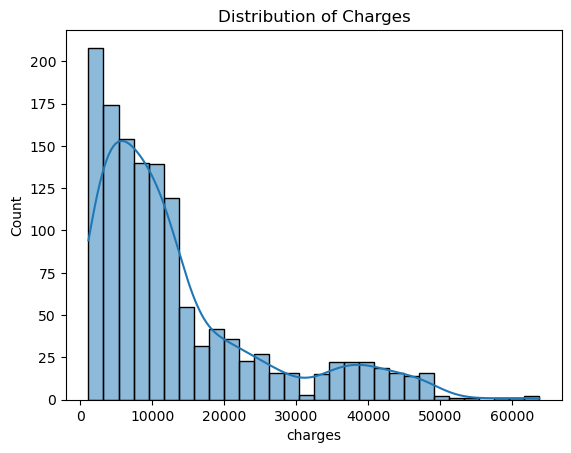

In [32]:
#Distribution of Targert Variable - visualizing the distribution of the 'charges' variable 
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()


 ##  Relationships Between Features and Target

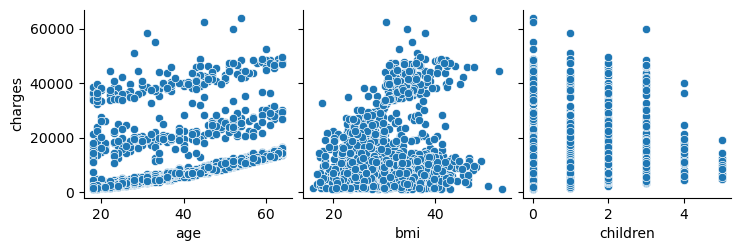

In [33]:
sns.pairplot(data, x_vars=['age', 'bmi', 'children'], y_vars='charges', kind='scatter')
plt.show()


## Gender Feature Analysis 

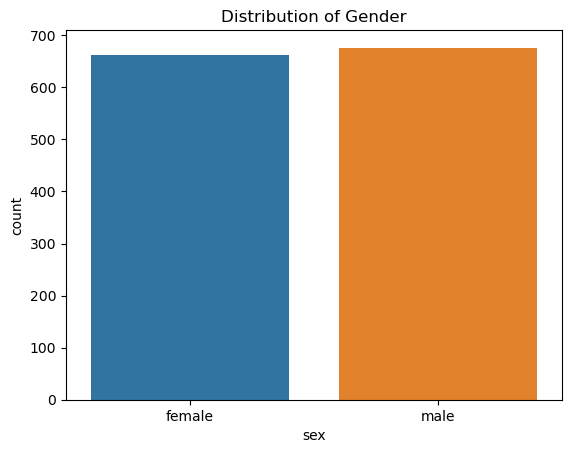

In [34]:
sns.countplot(x='sex', data=data)
plt.title('Distribution of Gender')
plt.show()


## Box Plots for Outlier Detection 

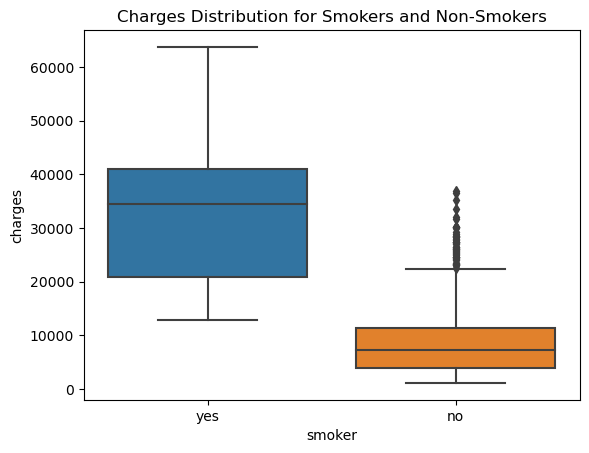

In [35]:
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Charges Distribution for Smokers and Non-Smokers')
plt.show()


## BMI Distribution by Smoker Status 

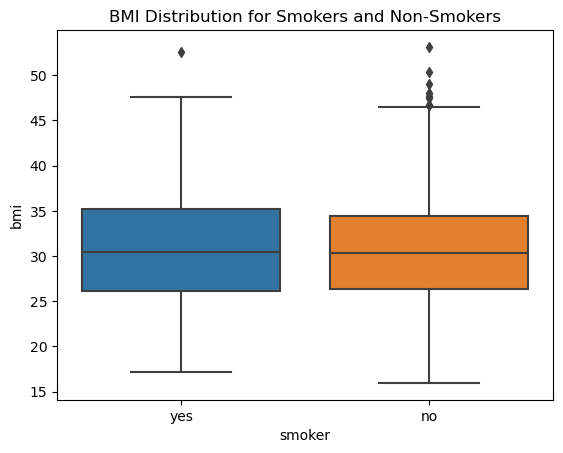

In [36]:
sns.boxplot(x='smoker', y='bmi', data=data)
plt.title('BMI Distribution for Smokers and Non-Smokers')
plt.show()


# Feature Selection 

### Converting categorical variables into numerical values using encoding 

In [51]:
# Feature Engineering
data['age_bmi_interaction'] = data['age'] * data['bmi']

# Preprocess categorical features using one-hot encoding
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

X_encoded = transformer.fit_transform(data.drop('charges', axis=1))

# Feature selection using SelectKBest with f_regression
selector = SelectKBest(f_regression, k='all')
X_selected = selector.fit_transform(X_encoded, data['charges'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, data['charges'], test_size=0.2, random_state=42)

# Machine Learning Model - Random Forest Algorithm

In [49]:
Mean Absolute Error: 2476.8578593648367
Mean Squared Error: 20655069.55679248
R-squared: 0.8669549866313273# Build the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 2476.8578593648367
Mean Squared Error: 20655069.55679248
R-squared: 0.8669549866313273


## Model Evaluation 

Model Evaluation Metrics:
- Mean Absolute Error (MAE):
  - MAE represents the average absolute difference between the actual and predicted insurance costs.
  - The MAE of approximately 2476.86 suggests that, on average,my model's predictions are off by around $2476.86.

- Mean Squared Error (MSE):
 - MSE measures the average squared difference between actual and predicted values.
 - The MSE of approximately 20655069.56 indicates that there are some instances where the model's predictions deviate significantly from the actual insurance costs, with larger errors having more impact.

- R-squared (Coefficient of Determination):

 - R-squared is a measure of how well the model explains the variance in the actual insurance costs.
 - An R-squared value of 0.867, indicates that my model captures and explains about 86.7% of the variability in the insurance costs. This suggests a good fit of the model to the data.

# Predicted Insurance Cost

In [55]:
# Make predictions
predictions = model.predict(X_test)

# Create a DataFrame with actual prices, predicted prices, and selected features
results_data = pd.DataFrame({
    'Actual Insurance Cost': y_test,
    'Predicted Insurance Cost': predictions,
})

# Display the DataFrame
print(results_data)

      Actual Insurance Cost  Predicted Insurance Cost
764              9095.06825              10312.136020
887              5272.17580               5456.267226
890             29330.98315              28231.666043
1293             9301.89355              10684.086992
259             33750.29180              34532.112403
...                     ...                       ...
109             47055.53210              47543.154796
575             12222.89830              13033.515949
535              6067.12675               5916.514495
543             63770.42801              48443.100058
846              9872.70100              10301.312775

[268 rows x 2 columns]
